Implement the Sobel Pipeline using the OpenCv functions for each of the steps:

### Sobel Pipeline with Noise Reduction

<ol>
<li>Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.</li>

<li>Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection process.</li>

<li>Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this convolution highlights edges in the image.</li>

<li>Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which involves taking the square root of the sum of the squares of the horizontal and vertical gradients.<br>
</li>

<li>Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the edges from the non-edges based on the magnitude of the gradient.</li>

</ol>

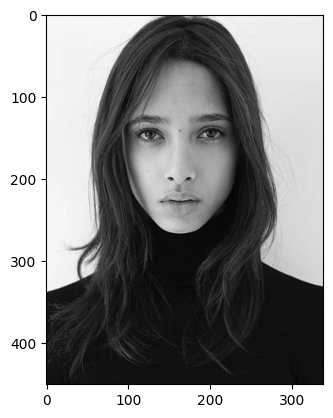

In [2]:
#1 Grayscale conversion:

#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#input image
img = cv2.imread('Graphics/facewb.jpg')

#convert to grayscale:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Gaussian Filter')

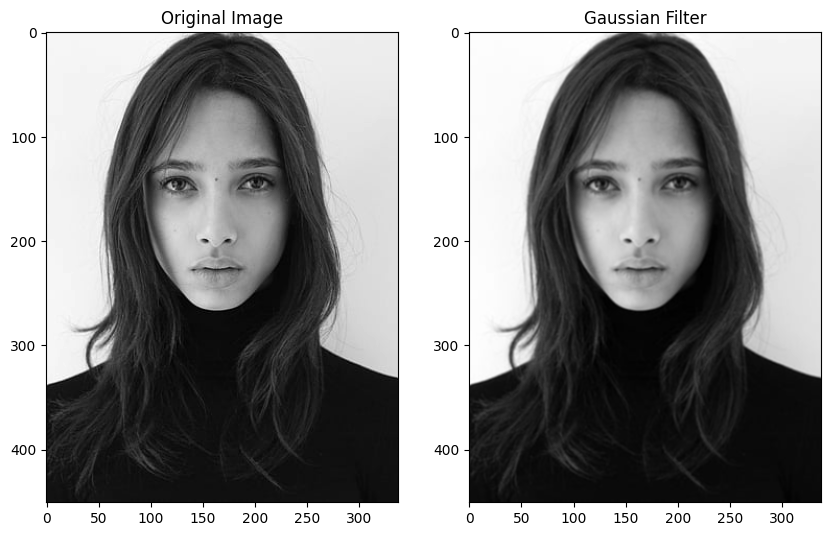

In [3]:
#2 Noise Reduction:

#gaussian blur filter:
gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16

#add filter to img
imgGaussian = cv2.filter2D(img, -1, gaussian_filter)

#plot size
fig  = plt.figure(figsize = (10,10))

#OG image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

#Blurred image
fig.add_subplot(1,2,2)
plt.imshow(imgGaussian, cmap='gray')
plt.title('Gaussian Filter')


Text(0.5, 1.0, 'Sobel Y Edge Detection')

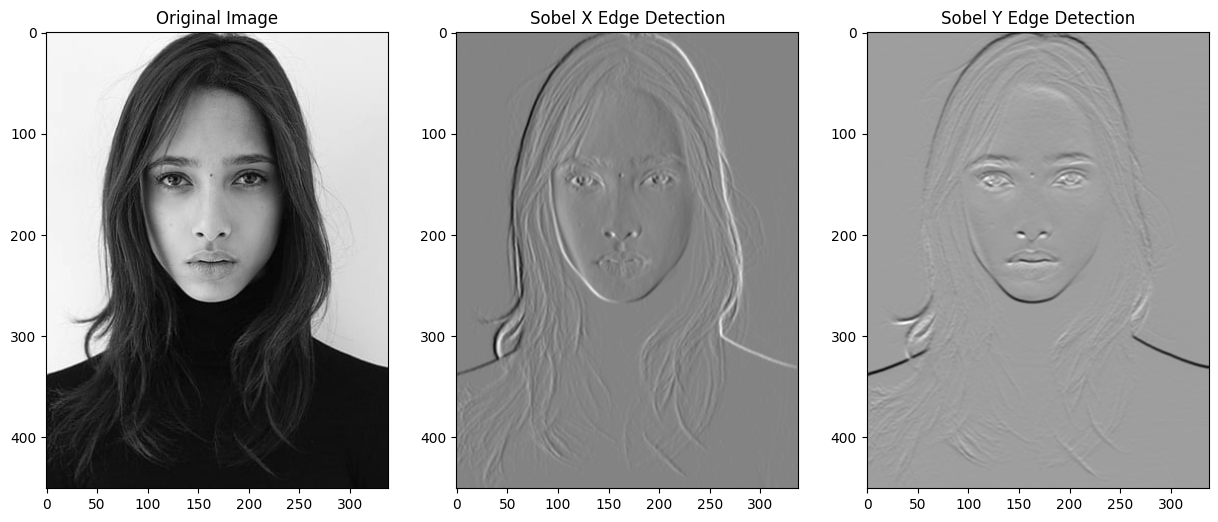

In [9]:
#3 Horizontal and Vertical Sobel Filtering (Sobel Operator):
#sobel operator detects edges marked by sudden changes in pixel intensity
#one kernel to detect sudden changes in pixel intensity in the X direction and another in the Y direction

sobelx = cv2.Sobel(imgGaussian, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(imgGaussian, cv2.CV_64F, 0, 1, ksize=3)

#plot size
fig  = plt.figure(figsize = (15,15))

# Create subplots
#OG Image:
fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

#Sobelx Image:
fig.add_subplot(1,3,2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X Edge Detection')

#Sobely image:
fig.add_subplot(1,3,3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y Edge Detection')


Text(0.5, 1.0, 'Magnitude')

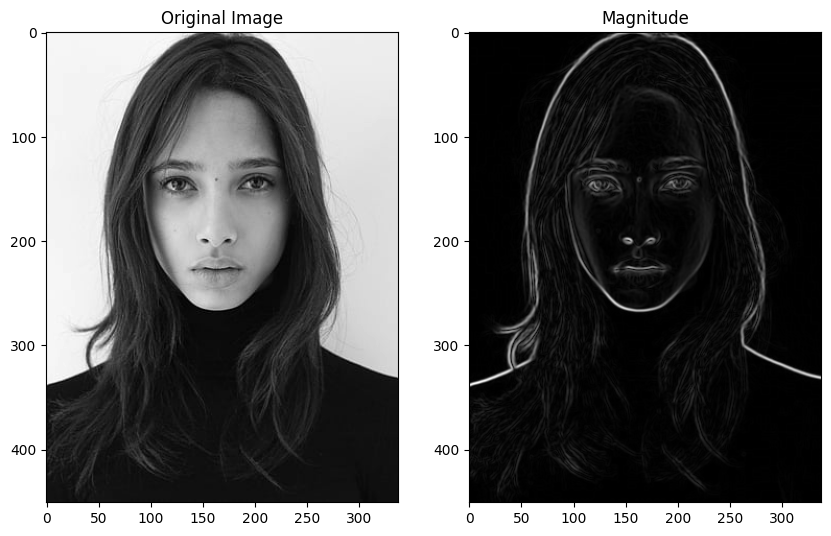

In [12]:
#4 Magnitude calculation:

#open cv magnitude function
magnitude = cv2.magnitude(sobelx, sobely)

#plot size
fig  = plt.figure(figsize = (10,10))

#OG image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

#Blurred image
fig.add_subplot(1,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude')

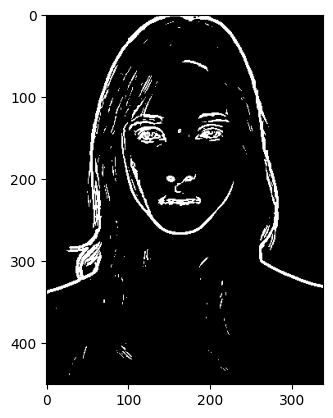

In [17]:
#5 Thresholding:
#threshold is applied to the edge map to produce a binary image
#edges are represented by white pixels and non-edges are represented by black pixels

#threshold filter
th, imgThreshold = cv2.threshold(magnitude, 100, 255, cv2.THRESH_BINARY);
plt.imshow(imgThreshold, cmap='gray')